In [1]:
trainpath='/kaggle/input/intel-image-classification/seg_train/seg_train/'
testpath='/kaggle/input/intel-image-classification/seg_test/seg_test/'
Valpath='/kaggle/input/intel-image-classification/seg_pred/seg_pred/'

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import glob
import os
import pathlib
import glob as gb
import PIL 
#imoirting lib
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [3]:
for folder in os.listdir(trainpath):
    print (folder)

mountain
street
buildings
sea
forest
glacier


In [4]:
#for folder in  os.listdir(trainpath):
#    print(folder)
#    print('--------------')
#    files = gb.glob(pathname= trainpath  + folder + '/*.jpg')
#    print(list(files[:3]))
#    print(folder ,' ........' ,len(files), ' images')
#    print('-----------------------------------------------------------------------------')

files[:10]

In [5]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name  Traning Image Numbers
0    mountain                   2512
1      street                   2382
2   buildings                   2191
3         sea                   2274
4      forest                   2271
5     glacier                   2404


In [6]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name  Traning Image Numbers
0    mountain                    525
1      street                    501
2   buildings                    437
3         sea                    510
4      forest                    474
5     glacier                    553


In [7]:
#Folder_name=[]
#folder_item_numbers = []
#for folder in  os.listdir(Valpath ) : 
#    files = gb.glob(pathname= str( Valpath  + folder + '/*.jpg'))
#    Folder_name.append(folder)
#    folder_item_numbers.append(len(files))
#foldernames=pd.DataFrame({'Folder_name':Folder_name})
#itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
#informations=pd.concat([foldernames,itemnumbers],axis=1)
#print(informations)

In [8]:
#image_class = {'mountain': 0, 'street': 1,'buildings': 2 ,'sea': 3 ,'forest': 4 ,'glacier' : 5}

In [9]:
#for k , v in image_class.items():
#    print ('key' , k)
#    print ('value' ,v)

# loading Training data and resize it and collect it in one folder****

In [10]:

new_size=224    
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in files: 
        image_class ={'buildings': 2, 'forest': 4,'glacier': 5 ,'mountain': 0 ,'sea': 3 ,'street':1}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_train.append(resized_image)
        y_train.append(image_class[folder])
    print('image reading ...finished')
print('--------------------------------------------------')        
#check items in X_test
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 

folder name is :  mountain
numbers of images in folder are :  2512
 start reading images
image reading ...finished
folder name is :  street
numbers of images in folder are :  2382
 start reading images
image reading ...finished
folder name is :  buildings
numbers of images in folder are :  2191
 start reading images
image reading ...finished
folder name is :  sea
numbers of images in folder are :  2274
 start reading images
image reading ...finished
folder name is :  forest
numbers of images in folder are :  2271
 start reading images
image reading ...finished
folder name is :  glacier
numbers of images in folder are :  2404
 start reading images
image reading ...finished
--------------------------------------------------
items in X_train is:        14034  items
items in y_train is:        14034  items


In [11]:
len(X_train )

14034

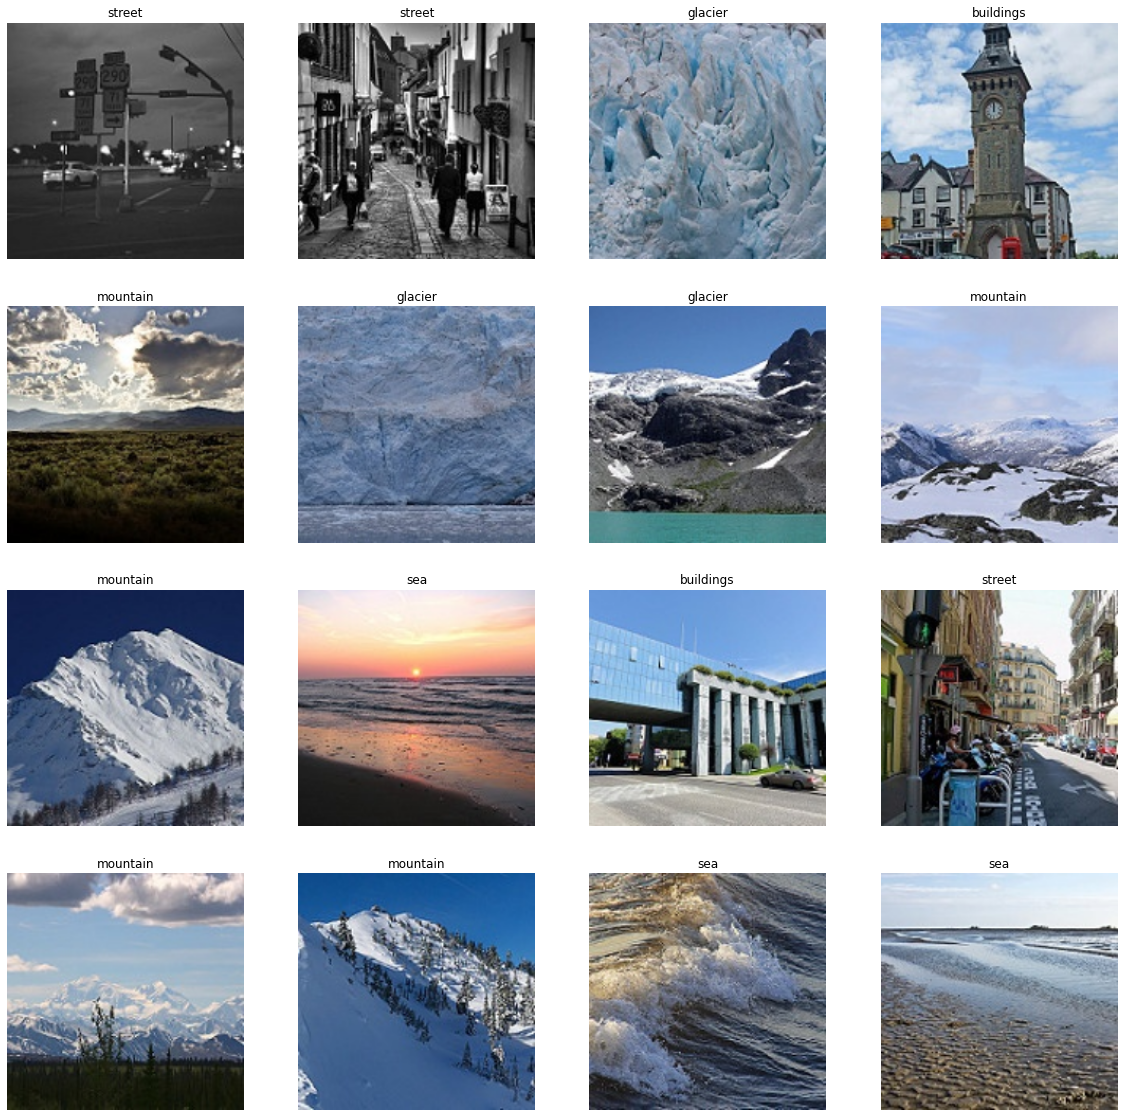

In [12]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train [i])   
    plt.axis('off')
    classes ={'mountain': 0, 'street': 1,'buildings': 2 ,'sea': 3 ,'forest': 4 ,'glacier' : 5}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))

In [13]:
#loading data and resize it and collect it in one folder
new_size=224    
X_test = []
y_test = []
for folder in  os.listdir(testpath ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    for file in files: 
        image_class = {'mountain': 0, 'street': 1,'buildings': 2 ,'sea': 3 ,'forest': 4 ,'glacier' : 5}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_test.append(resized_image)
        y_test.append(image_class[folder])
#check items in X_test
print("items in X_test is:       ",len(X_test) , " items") 
print("items in y_test is:       ",len(y_test) , " items") 

folder name is :  mountain
numbers of images in folder are :  525
folder name is :  street
numbers of images in folder are :  501
folder name is :  buildings
numbers of images in folder are :  437
folder name is :  sea
numbers of images in folder are :  510
folder name is :  forest
numbers of images in folder are :  474
folder name is :  glacier
numbers of images in folder are :  553
items in X_test is:        3000  items
items in y_test is:        3000  items


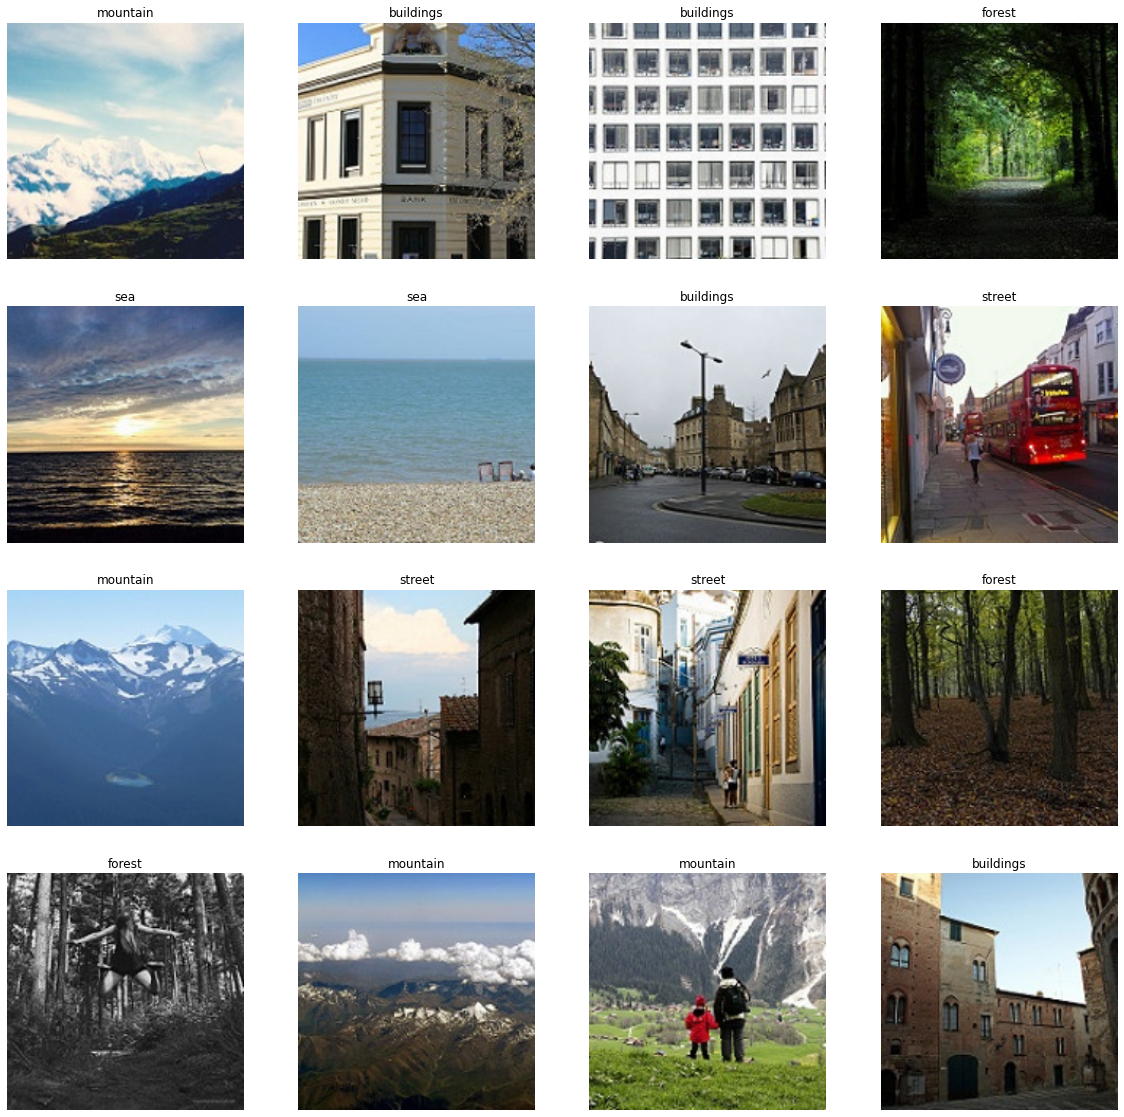

In [14]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    classes =  {'mountain': 0, 'street': 1,'buildings': 2 ,'sea': 3 ,'forest': 4 ,'glacier' : 5}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_test[i]))

In [15]:
predpath='/kaggle/input/intel-image-classification/seg_pred/seg_pred'

x_pred=[]
files=gb.glob(pathname= str( predpath + '/*.jpg')) 

for file in files:
    imag=cv2.imread(file)
   
    image = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)

    imagee= cv2.resize(image , (new_size,new_size))

    x_pred.append(list(imagee))

# **#converting all TRAIN data to array**

In [16]:
#converting all TRAIN data to array
X_train = np.array(X_train)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape  : (14034, 224, 224, 3)
y_train shape : (14034,)


In [17]:
#converting all TEST data to array
X_test = np.array(X_test)
y_test = np.array(y_test)
print("X_test shape  :" ,X_test.shape)
print("y_test shape :", y_test.shape)

X_test shape  : (3000, 224, 224, 3)
y_test shape : (3000,)


In [18]:
x_pred = np.array(x_pred)
print("x_pred shape  :" ,x_pred.shape)

x_pred shape  : (7301, 224, 224, 3)


In [19]:
#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train,6)
#y_test = to_categorical(y_test,6)

# #shuffle data

In [20]:
#from sklearn.utils import shuffle
#X_train,y_train = shuffle(X_train,y_train)
#X_test,y_test = shuffle(X_test,y_test)

In [21]:
##checking label after shuffle
#y_test[:6]

# #normalizing data

In [22]:
#X_train=X_train/255.0
#X_test=X_test/255.0

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

In [24]:
model = Sequential([
    Conv2D(200,3, padding = "same", activation = "relu" ,input_shape=(224, 224, 3)),
    MaxPooling2D(5,5),
    
    Conv2D(150,3, padding = "same",activation = "relu"),
    
    Conv2D(120,3, padding = "same", activation = "relu"),
    Dropout(rate=0.5),
   
    Conv2D(80,3, padding = "same",activation = "relu"),
    
    Conv2D(50,3, padding = "same", activation = "relu"),
    MaxPooling2D(5,5),
  
   
    
    Flatten(),
    Dense(120,activation = "relu"),
    Dense(100,activation = "relu"),
    Dense(50,activation = "relu"),
   
    Dropout(rate=0.5),
    
    Dense(6, activation='softmax')
])

2022-10-19 12:13:03.971079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 12:13:04.063194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 12:13:04.064025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 12:13:04.066002: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 200)     5600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 150)       270150    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 120)       162120    
_________________________________________________________________
dropout (Dropout)            (None, 44, 44, 120)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 50)        3

In [26]:
opt=tf.keras.optimizers.Adam(0.0001)
#compliling model
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy' , metrics='accuracy')

# #training models

In [27]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger, LearningRateScheduler,TensorBoard
earlystop=EarlyStopping(patience=15)
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')
log_fname = 'model_log.csv'
csv_logger = CSVLogger(filename=log_fname,separator=',',append=False)
callbacks_list = [checkpoint, csv_logger,earlystop] 

In [28]:
X_train.shape,y_train.shape

((14034, 224, 224, 3), (14034,))

In [29]:
batch_size=16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_data_gen  = ImageDataGenerator()
test = test_data_gen.flow(
      X_test,
      y_test,
      shuffle=True, 
      batch_size=batch_size
      )

In [30]:
history= model.fit(X_train,y_train,validation_data=test,
                   epochs=25,verbose=1,batch_size=32,callbacks=[callbacks_list])

2022-10-19 12:13:06.569182: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2112509952 exceeds 10% of free system memory.
2022-10-19 12:13:09.215640: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2112509952 exceeds 10% of free system memory.
2022-10-19 12:13:10.922548: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-10-19 12:13:12.593738: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


439/439 [==============================] - 38s 69ms/step - loss: 1.6206 - accuracy: 0.3706 - val_loss: 1.2593 - val_accuracy: 0.5603

Epoch 00001: val_accuracy improved from -inf to 0.56033, saving model to model.h5
Epoch 2/25
439/439 [==============================] - 29s 66ms/step - loss: 1.2611 - accuracy: 0.5009 - val_loss: 1.1901 - val_accuracy: 0.5653

Epoch 00002: val_accuracy improved from 0.56033 to 0.56533, saving model to model.h5
Epoch 3/25
439/439 [==============================] - 29s 66ms/step - loss: 1.1302 - accuracy: 0.5552 - val_loss: 1.1275 - val_accuracy: 0.6170

Epoch 00003: val_accuracy improved from 0.56533 to 0.61700, saving model to model.h5
Epoch 4/25
439/439 [==============================] - 29s 66ms/step - loss: 1.0298 - accuracy: 0.6074 - val_loss: 1.0186 - val_accuracy: 0.6753

Epoch 00004: val_accuracy improved from 0.61700 to 0.67533, saving model to model.h5
Epoch 5/25
439/439 [==============================] - 29s 66ms/step - loss: 0.9405 - accuracy:

# #showing results and model accuracy 

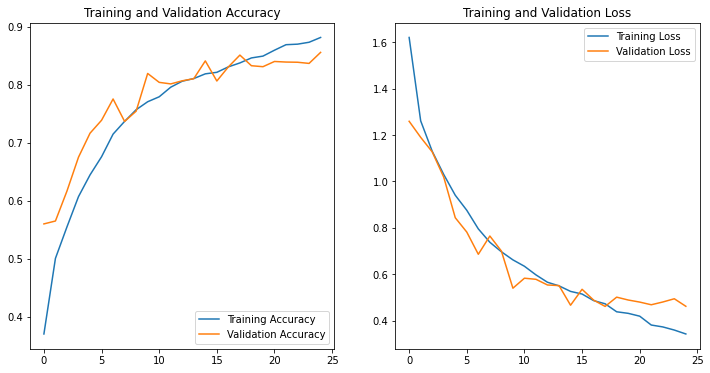

In [31]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
#epochs=30
epochs_range = range(25)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [32]:
from keras.models import load_model
model = load_model('./model.h5')
metrics = model.evaluate(X_test, y_test)

2022-10-19 12:25:13.210650: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 451584000 exceeds 10% of free system memory.
2022-10-19 12:25:13.421736: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 451584000 exceeds 10% of free system memory.


94/94 [==============================] - 2s 24ms/step - loss: 0.4618 - accuracy: 0.8560


In [33]:
prediction = model.predict(X_test)
prediction.shape


2022-10-19 12:25:15.895890: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 451584000 exceeds 10% of free system memory.


(3000, 6)

In [ ]:
prediction = model.predict(x_pred)

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    plt.title(ImageClass(np.argmax(prediction[i])))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_prediction)
cm

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(6, 6))
plt.show()